# Quantum Computing
****

What is Quantum Computing?
Quantum Computing focuses on the development of computer technologies. It is centered upon Quantum Theory; the behaviour and nature of energy and matter on an atomic and subatomic (quantum) level. Quantum theory gives us a more complete picture of the universe. We can use unexplained behavior to perform certain computations that were previously deemed not possible.

In [2]:
# Generating random numbers.
import numpy as np

# Plotting.
import seaborn as sns

# Random numbers and choices.
import random

# Combinations and permutation.
import itertools

## Probability Tree
If you place a fair coin in the state Tails and then flip it, there is a 50% chance of seeing Tails and a 50% chance of seeing Heads. We can plot this on a probability tree like so:

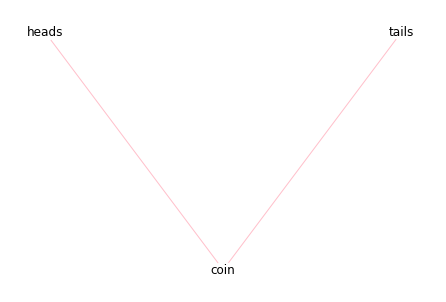

In [1]:
# Import the NetworkX package
import networkx as nx

# Import matplotlib library to visualize the graph in a Jupyter Notebook
import matplotlib.pyplot as plt


# Create a Graph() object and relate it to the variable 'graph_1'
graph_1 = nx.Graph()

graph_1.add_nodes_from(['coin','heads','tails'])

# Add the edges:
graph_1.add_edges_from([('coin', 'heads'), ('coin', 'tails')])

# Use the .draw() function to visualize the graph
nx.draw_spectral(graph_1,with_labels=True, edge_color="pink", node_color="white")


predicting the outcome of chained events leads to 50% chance of getting 'Heads' or 'Tails'
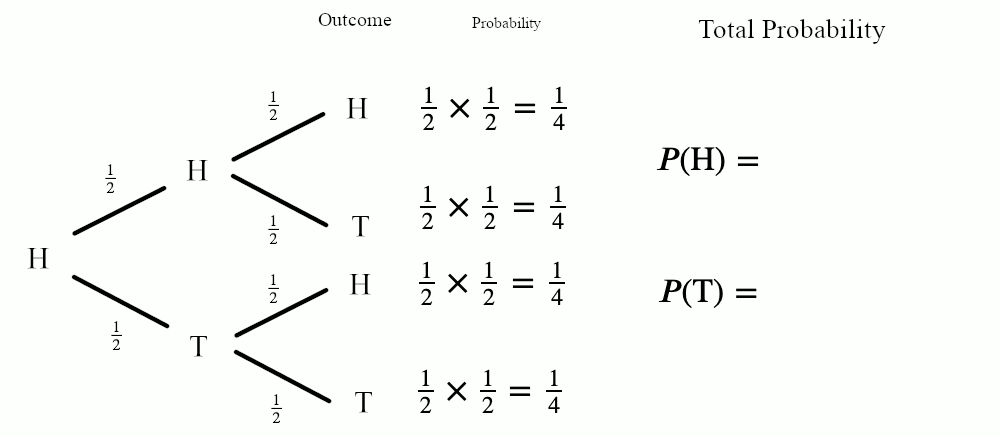

In [4]:
# Simulating flipping one coin 50 times.
np.random.binomial(1, 0.5, 50)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1])

In [5]:
# Flip coin 50  times, Counting total of tails.
np.random.binomial(50, 0.5)

27

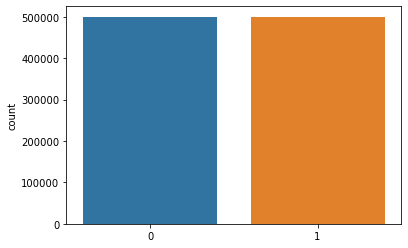

In [6]:
# Plot result. Expected result: roughly 50/50.
sns.countplot(x=np.random.binomial(1, 0.5, 1000000));

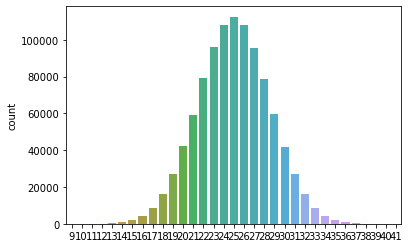

In [7]:
# Outcomes of flipping fifty coins.
sns.countplot(x=np.random.binomial(50, 0.5, 1000000));

## Qubits
To measure probabilities, Quantum Computing uses a Qubit, which is a quantam variant of a bit. Qubit's use 0 and 1 as states and can store a single binary piece of information. They can be manipulated with quantum mechanics to give new gates, allowing new ways to design algorithms.
$\lVert x \rVert$

Unlike classical bits, Qubits are not restricted to it's state. The state of a Qubit is more complex than a binary value. Getting a 0 or 1 from a Qubit only needs to be well-defined when measurements are made to extract an output.<br>
Representing Qubits with a mutually exclusive state of 0 or 1 can be done using <i> orthogonal vectors. </i> :
<br>
<font color="salmon">
<b>state 0: </b>
$|0\rangle = $ 
$\begin {bmatrix} 1 \\ 0\end{bmatrix}$
</font>
<br>
<br>
<font color="MediumVioletRed">
<b>state 1:</b>
$|1\rangle = $ 
$\begin {bmatrix} 0 \\ 1\end{bmatrix}$
</font>
<br>
These two states ($|0\rangle$  & $|1\rangle$) form an orthonormal basis. This means any 2D vector can be represented by combining them. Therefore the state of the Qubit can be written using the following notation: <br>
$|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $
<br>
$|q_0\rangle$ is the statevector of the Qubit. In the notation above, the statevector is expressed as a superposition (linear combination) of $|0\rangle and |1\rangle$

In [1]:
import qiskit
from qiskit import QuantumCircuit, assemble, Aer
import qiskit.visualization as viz
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

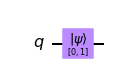

In [22]:
qc = qiskit.QuantumCircuit(1)  # Create a quantum circuit with one qubit
qc.initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw(output='mpl')

In [23]:
sim = Aer.get_backend('aer_simulator')

In [24]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [25]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


The result above is a vector with the following complex elements (python uses j for imaginary units):<br>
0.+0j = 0 <br>
1.+0.j = 1

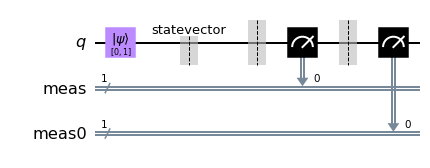

In [27]:
qc.measure_all()
qc.draw(output='mpl')

Getting the counts for 0 and 1 results using .get_counts():

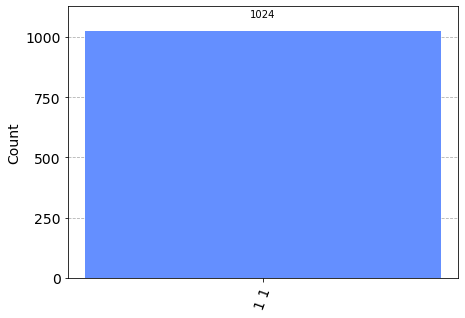

In [28]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

The result shows that there is a 100% chance of measuring $|1\rangle = $ as expected.
<br>
The code below demonstrates the superposition of the Qubit using the state $|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $

In [30]:
# Define state |q0>
initial_state = [1/sqrt(2), 1j/sqrt(2)]  

In [31]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


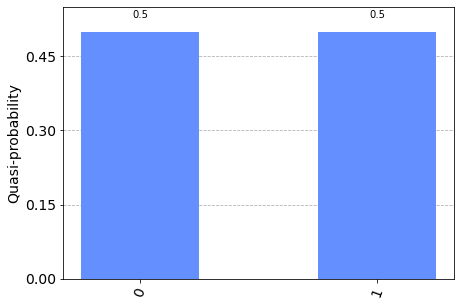

In [32]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

The histogram shows an equal chance of measuring $|0\rangle$ or $|1\rangle$

To find the probability of measuring a state $|ψ\rangle$ in the state $|x\rangle$ the following formula can be used:
$p(|x\rangle) = | \langle x| ψ\rangle |^2$
<br>
$|x\rangle$ is the row vector. <br>
$| ψ\rangle$ is the column vector. <br>
converting between the bra-ket notation can be done using conjugate transpose. 
Using the formula above, the probability of measuring $|x\rangle$ can be calculated by taking the inner product of $|x\rangle$ and the state we are measuring in, $| ψ\rangle$ and then squaring the magnitude.
<br><br>

### <font color='salmon' >Measuring the probability of $|0\rangle$ : </font>
<br>
$|q_0\rangle = \frac{1}{\sqrt2} |0\rangle + \frac{i}{\sqrt2}|1\rangle $ <br><br>
$\langle0  |q_0\rangle = \frac{1}{\sqrt2} \langle 0|0\rangle + \frac{i}{\sqrt2}\langle0 |1\rangle $ <br><br>
= $\frac{1}{\sqrt2} .1 + \frac{i}{\sqrt2}. 0 $ <br><br>
= $\frac{1}{\sqrt2}$ <br><br>
= $|\langle0 |q_0\rangle |^2 = \frac{1}{2} $ <br><br>
The probability is 0.5 or $\frac{1}{2}$

### <font color='MediumVioletRed' >Measuring the probability of $|1\rangle$ : </font>
<br>
= $|\langle1 |q_1\rangle |^2 = \frac{i}{2} $ <br><br>
The probability is 0.5 or $\frac{1}{2}$

***
## Quantum Gates
***

In [4]:
import qiskit
# Qiskit Visualisation.
#import qiskit.visualization as viz
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [5]:
# Qiskit version.
qiskit.__qiskit_version__ 

{'qiskit-terra': '0.22.3', 'qiskit-aer': '0.11.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [6]:
# Creating a circuit with 8 Qubits & 8 outputs.
qc_output = QuantumCircuit(8)
qc_output.draw(initial_state=True)

q_0: |0>
        
q_1: |0>
        
q_2: |0>
        
q_3: |0>
        
q_4: |0>
        
q_5: |0>
        
q_6: |0>
        
q_7: |0>

In [7]:
# Adds a measurement to each qubit in the circuit qc_output.
qc_output.measure_all()

In [8]:
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

<font color= "orange" > <h6> Qubits are initialized to give an output of 0, like in the circuit above. <br>
To visualise this, the circuit has been run many times and the results plotted in a histogram are shown below. </font> </h6>

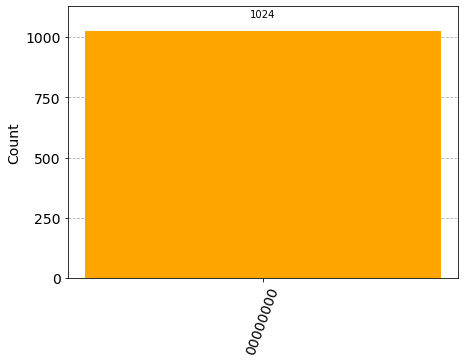

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts, color="orange")

## NOT Gate
A NOT gate flips the bit values so 0 = 1 and 1 = 0.
- x represents the operation that does NOT calculation.

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [11]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

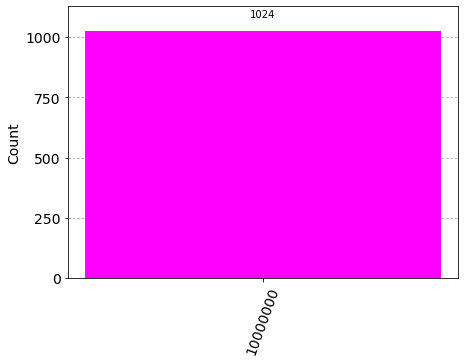

In [12]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts, color="fuchsia")

<font color="fuchsia"> <h6> Note how in the histogram above, the output is 10000000, instead of all 0s. </h6> </font>

In [13]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(1)

qc_encode.draw()

q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
q_2: ──────────
               
q_3: ──────────
               
q_4: ──────────
               
q_5: ──────────
               
q_6: ──────────
               
q_7: ──────────

In [14]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ───────────░─┤M├─────────────────────
        ┌───┐┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ X ├┤ X ├─░──╫─┤M├──────────────────
        └───┘└───┘ ░  ║ └╥┘┌─┐               
   q_2: ───────────░──╫──╫─┤M├───────────────
                   ░  ║  ║ └╥┘┌─┐            
   q_3: ───────────░──╫──╫──╫─┤M├────────────
                   ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ───────────░──╫──╫──╫──╫─┤M├─────────
                   ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ───────────░──╫──╫──╫──╫──╫─┤M├──────
                   ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ───────────░──╫──╫──╫──╫──╫──╫─┤M├───
                   ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ───────────░──╫──╫──╫──╫──╫──╫──╫─┤M├
                   ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/══════════════╩══╩══╩══╩══╩══╩══╩══╩═
                      0  1  2  3  4  5  6  7

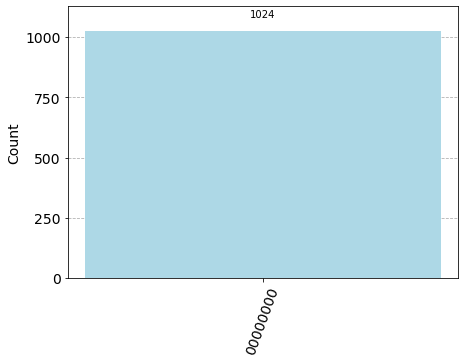

In [15]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts, color="lightblue")

## CNOT Gate
The CNOT gate behaves in the same way as a XOR gate. It determines if two Qubits are different.

| Input1 | Input2 | XOR Output |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

<c>Possible CNOT inputs & the corresponding outputs.</c>

| Input(q1q0) | Output(q1q0) |
| --- | --- |
| 00 | 00 |
| 01 | 11 |
| 10 | 10 |
| 11 | 01 |

In [16]:
# Draw a CNOT gate;
# small black square is the control qubit.
# larger white sqaure is the target qubit.
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [17]:
# Testing different CNOT inputs: (0,1) (1,0)
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [18]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(1,0)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐┌───┐┌─┐   
q_0: ┤ X ├┤ X ├┤M├───
     └───┘└─┬─┘└╥┘┌─┐
q_1: ───────■───╫─┤M├
                ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

The CNOT sees that qubit 0 is in state 1, and so applies a NOT to qubit 1. This flips the 0 of qubit 1 into a 1, and so turns 01 into 11.

In [19]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

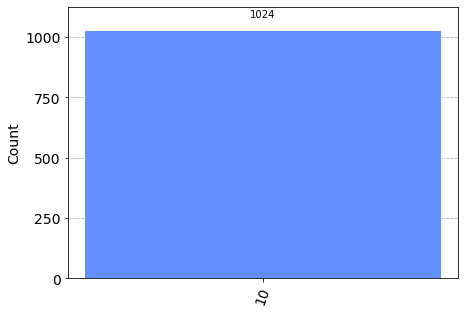

In [20]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Result on histogram is 10. This means the computer can solve the 1 + 1 problem.